## Deformations

In [3]:
import cv2,dlib,time,dlib
import numpy as np
import mls as mls
import faceBlendCommon as fbc
import matplotlib.pyplot as plt
from dataPath import DATA_PATH
%matplotlib inline

In [1]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['image.interpolation'] = 'bilinear'

In [4]:
mls.GRID = 80

In [5]:
# Function to add boundary points of the image to the given 
# set of points
def addBoundaryPoints(cols, rows, points):
  # include the points on the boundaries
  points = np.append(points,[[0, 0]],axis=0)
  points = np.append(points,[[0, cols-1]],axis=0)
  points = np.append(points,[[rows-1, 0]],axis=0)
  points = np.append(points,[[rows-1, cols-1]],axis=0)
  points = np.append(points,[[0, cols/2]],axis=0)
  points = np.append(points,[[rows/2, 0]],axis=0)
  points = np.append(points,[[rows-1, cols/2]],axis=0)
  points = np.append(points,[[rows/2, cols-1]],axis=0)
  return points

In [6]:
# Variables for resizing to a standard height
RESIZE_HEIGHT = 360
FACE_DOWNSAMPLE_RATIO = 1.5

# Varibales for Dlib 
modelPath = DATA_PATH + "models/shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(modelPath)

In [7]:
# Amount of bulge to be given for fatify
offset = 1.5

In [8]:
# Points that should not move
anchorPoints = [1, 15, 30]

# Points that will be deformed
deformedPoints = [ 5, 6, 8, 10, 11]

In [9]:
t = time.time()

# Read an image and get the landmark points
filename = DATA_PATH + '/images/hillary_clinton.jpg'

src = cv2.imread(filename)
height, width = src.shape[:2]

IMAGE_RESIZE = np.float32(height)/RESIZE_HEIGHT

src = cv2.resize(src,None,
                   fx=1.0/IMAGE_RESIZE, 
                   fy=1.0/IMAGE_RESIZE, 
                   interpolation = cv2.INTER_LINEAR)
landmarks = fbc.getLandmarks(detector, predictor, 
                             src, FACE_DOWNSAMPLE_RATIO)

print("Landmarks calculated in {}".format(time.time() - t))

Landmarks calculated in 0.027419090270996094


In [10]:
# Set the center of face to be the nose tip
centerx, centery = landmarks[30][0], landmarks[30][1]

In [11]:
# Variables for storing the original and deformed points
srcPoints = []
dstPoints=[]

# Adding the original and deformed points using the landmark points
for idx in anchorPoints:
  srcPoints.append([landmarks[idx][0], landmarks[idx][1]])
  dstPoints.append([landmarks[idx][0], landmarks[idx][1]])

for idx in deformedPoints:
  srcPoints.append([landmarks[idx][0], landmarks[idx][1]])
  dstPoints.append([offset*(landmarks[idx][0] - centerx) + centerx, 
                    offset*(landmarks[idx][1] - centery) + centery])

# Converting them to numpy arrays
srcPoints = np.array(srcPoints)
dstPoints = np.array(dstPoints)

# Adding the boundary points to keep the image stable globally
srcPoints = addBoundaryPoints(src.shape[0],src.shape[1],srcPoints)
dstPoints = addBoundaryPoints(src.shape[0],src.shape[1],dstPoints)

print("Points gathered {}".format(time.time() - t))

Points gathered 15.669212818145752


In [12]:
# Performing moving least squares deformation on the image using the 
# points gathered above
dst = mls.MLSWarpImage(src, srcPoints, dstPoints)

print("Warping done {}".format(time.time() - t))

Warping done 26.704975128173828


Total time 34.64876103401184


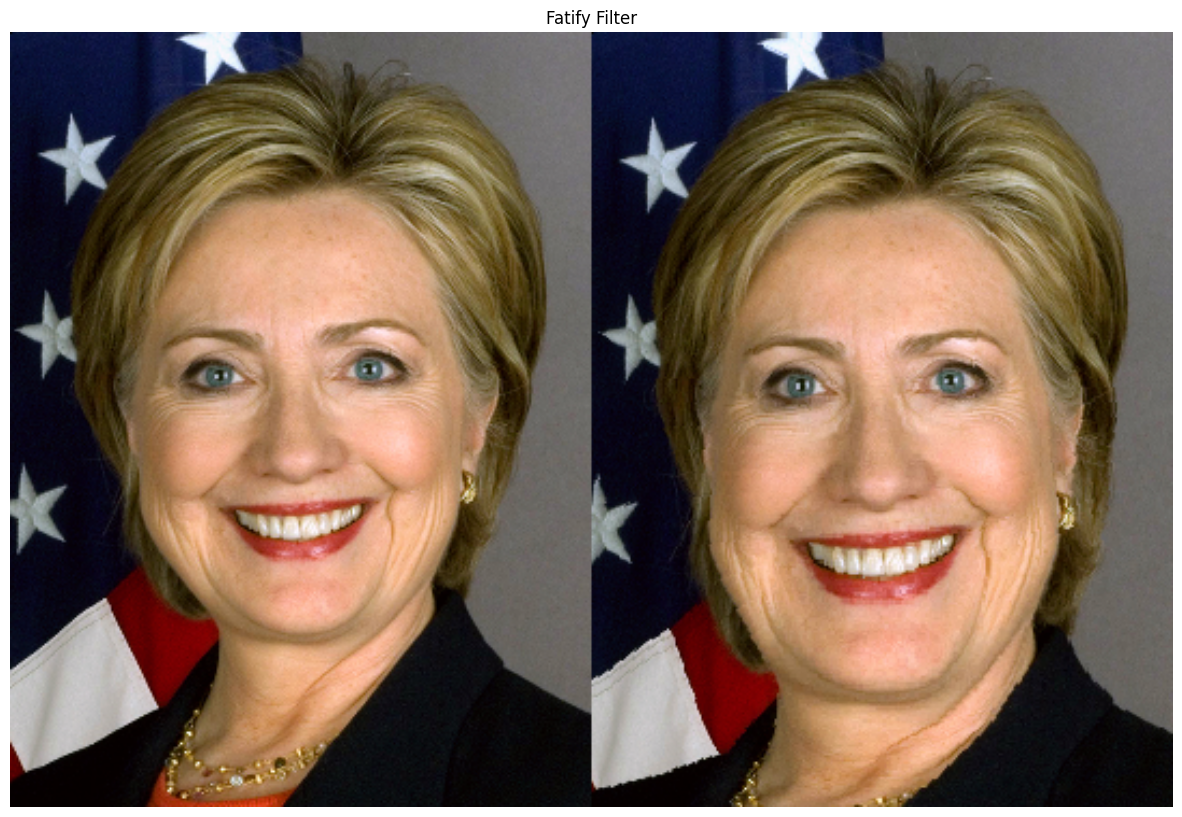

In [13]:
# Display and save the images
combined = np.hstack([src, dst])

plt.figure(figsize = (15,15))
plt.imshow(combined[:,:,::-1])
plt.title('Fatify Filter')
plt.axis('off')

print("Total time {}".format(time.time() - t))

### Hapify Filter

In [14]:
# Function to add boundary points of the image to the given set of
#  points
def addBoundaryPoints(cols, rows, points):
  # include the points on the boundaries
  points = np.append(points,[[0, 0]],axis=0)
  points = np.append(points,[[0, cols-1]],axis=0)
  points = np.append(points,[[rows-1, 0]],axis=0)
  points = np.append(points,[[rows-1, cols-1]],axis=0)
  points = np.append(points,[[0, cols/2]],axis=0)
  points = np.append(points,[[rows/2, 0]],axis=0)
  points = np.append(points,[[rows-1, cols/2]],axis=0)
  points = np.append(points,[[rows/2, cols-1]],axis=0)
  return points

In [15]:
# Variables for resizing to a standard height
RESIZE_HEIGHT = 360
FACE_DOWNSAMPLE_RATIO = 1.5

# MLS grid size
mls.GRID = 30

In [16]:
# Varibales for Dlib 
modelPath = DATA_PATH + "models/shape_predictor_68_face_landmarks.dat"
faceDetector = dlib.get_frontal_face_detector()
landmarkDetector = dlib.shape_predictor(modelPath)

In [17]:
# Parameters for controlling the amount of deformation 
offset1 = 1.5
offset2 = 1.5

In [18]:
# Points that should not move
anchorPoints = [8, 30]

# Points that will be deformed
# For lips
deformedPoints1 = [48, 57, 54]
# For eyes
deformedPoints2 = [21, 22, 36, 45]

In [19]:
t = time.time()
# Read an image and get the landmark points
filename = DATA_PATH + '/images/ted_cruz.jpg'
src = cv2.imread(filename)
height, width = src.shape[:2]
IMAGE_RESIZE = np.float32(height)/RESIZE_HEIGHT
src = cv2.resize(src,None,
                   fx=1.0/IMAGE_RESIZE, 
                   fy=1.0/IMAGE_RESIZE, 
                   interpolation = cv2.INTER_LINEAR)
landmarks = fbc.getLandmarks(faceDetector, landmarkDetector, src, 
                             FACE_DOWNSAMPLE_RATIO)

print("Landmarks calculated in {}".format(time.time() - t))

Landmarks calculated in 0.02572321891784668


In [20]:
# Set the center to tip of chin
center1x, center1y = landmarks[8][0], landmarks[8][1]
# Set the center to point on nose
center2x, center2y = landmarks[28][0], landmarks[28][1]

In [21]:
# Variables for storing the original and deformed points
srcPoints = []
dstPoints = []

# Adding the original and deformed points using the landmark points
for idx in anchorPoints:
  srcPoints.append([landmarks[idx][0], landmarks[idx][1]])
  dstPoints.append([landmarks[idx][0], landmarks[idx][1]])

In [22]:
for idx in deformedPoints1:
  srcPoints.append([landmarks[idx][0], landmarks[idx][1]])
  dstPoints.append([offset1*(landmarks[idx][0] - center1x) + 
                    center1x, offset1*(landmarks[idx][1] - center1y)
                    + center1y])

for idx in deformedPoints2:
  srcPoints.append([landmarks[idx][0], landmarks[idx][1]])
  dstPoints.append([offset2*(landmarks[idx][0] - center2x) + 
                    center2x, offset2*(landmarks[idx][1] - center2y)
                    + center2y])

# Converting them to numpy arrays
srcPoints = np.array(srcPoints)
dstPoints = np.array(dstPoints)

In [23]:
# Adding the boundary points to keep the image stable globally
srcPoints = addBoundaryPoints(src.shape[0],src.shape[1],srcPoints)
dstPoints = addBoundaryPoints(src.shape[0],src.shape[1],dstPoints)

In [24]:
print("Points gathered {}".format(time.time() - t))

Points gathered 41.900415897369385


In [25]:
# Performing moving least squares deformation on the image using the 
# points gathered above
dst = mls.MLSWarpImage(src, srcPoints, dstPoints)

print("Warping done {}".format(time.time() - t))

Warping done 50.503984212875366


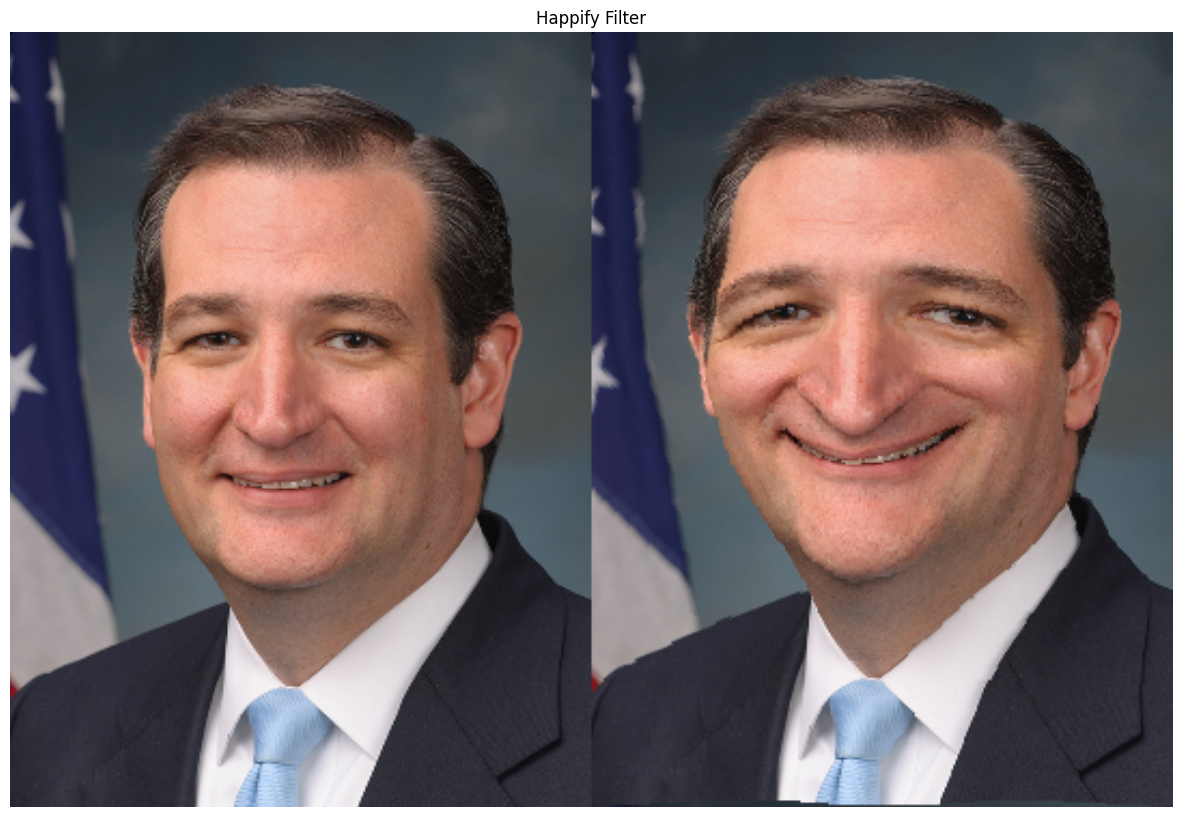

Total time 57.4912850856781


In [26]:
# Display and save the images
combined = np.hstack([src, dst])

plt.figure(figsize = (15,15))
plt.imshow(combined[:,:,::-1])
plt.title("Happify Filter")
plt.axis('off')
plt.show()


print("Total time {}".format(time.time() - t))